<a href="https://colab.research.google.com/github/DrAlexSanz/Data-Week-1-DNN/blob/master/Week_2_DNN_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

from pandas import read_hdf
# from dnn_app_utils_v3 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

print("Everything ok so far. This is encouraging.")

Everything ok so far. This is encouraging.


Now load data from Github. Because I have it there. Needs to be public.

In [0]:
# ! git clone https://github.com/DrAlexSanz/Data-Week-1-DNN.git
  
#from lr_utils import load_dataset

If this reading doesn't work, restart the run environment. Why? Because then it works.

In [0]:

with h5py.File("train_catvnoncat.h5") as train:
  train_x = np.array(train["train_set_x"][:]) # your train set features
  train_y = np.array(train["train_set_y"][:]) # your train set labels

#print(train_set_x_orig)

with h5py.File("test_catvnoncat.h5") as test:
  test_x = np.array(test["test_set_x"][:]) # your train set features
  test_y = np.array(test["test_set_y"][:]) # your train set labels
  classes = np.array(test["list_classes"][:]) # the list of classes

#print(test_x) #Prints to check




Ok now I have everything read, I´m going to check if the pictures are shown ok with imshow.

The 6th picture shows a cat


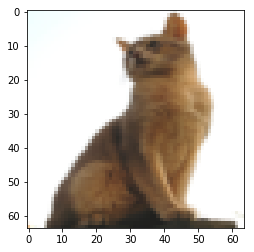

In [4]:
index = 6

plt.imshow(test_x[index]) #This only shows the picture

print("The "+str(index)+"th picture shows a "+classes[np.squeeze(test_y[index])].decode("utf-8"))

Now to see the structure of the data I use .shape()

In [5]:
print("The shape of the train dataset is: ", train_x.shape)
print("The shape of the test dataset is: ", test_x.shape)

The shape of the train dataset is:  (209, 64, 64, 3)
The shape of the test dataset is:  (50, 64, 64, 3)


This is read: The train dataset is 209 images, 64x64x3 pixels with 3 being the RGB colours. For the test, it's only 50 images. Reshaping it to a flat array (n,1) will give a (64x64x3,1) array.

In [6]:
train_x = train_x.reshape(train_x.shape[0],-1).T
test_x = test_x.reshape(test_x.shape[0],-1).T

print("The shape of the train dataset is: ", train_x.shape)
print("The shape of the test dataset is: ", test_x.shape)

The shape of the train dataset is:  (12288, 209)
The shape of the test dataset is:  (12288, 50)


And this is read: the dataset has 209 (50) columns (vectors), that are 12288 pixels long. Don't forget the .T.
Besides, the y's need to be stacked horizontally also. One after the other in a row to be consistent with the previous cell formulation.

In [7]:
train_y = train_y.reshape(train_y.shape[0],-1).T
test_y = test_y.reshape(test_y.shape[0],-1).T

print("The shape of the train dataset is: ", train_y.shape)
print("The shape of the test dataset is: ", test_y.shape)

The shape of the train dataset is:  (1, 209)
The shape of the test dataset is:  (1, 50)
